# Importing Libraries

In [286]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression


In [165]:
data=df.copy()
data= pd.read_csv('sms_spam.csv')

In [166]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [167]:
data.shape

(5572, 5)

## Data Cleaning

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [169]:
#droping the columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)

In [170]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [171]:
# renaming columns
data.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)
data.sample(5)

,Target,Text
190,spam,Are you unique enough? Find out from 30th Augu...
5324,ham,"Dear Sir,Salam Alaikkum.Pride and Pleasure mee..."
4123,ham,"Hey sexy buns ! Have I told you ? I adore you,..."
5262,ham,Did you see that film:)
4822,ham,:-) :-)


In [172]:
# labelling ham as '0' and spam as '1'
encoder= LabelEncoder()
data['Target']=encoder.fit_transform(data['Target'])
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [173]:
# check for missing values
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [174]:
# check for duplicacies
data.duplicated().sum()

403

In [175]:
# removing duplicacies
data= data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [176]:
data.shape

(5169, 2)

### EDA

In [177]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [178]:
data['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

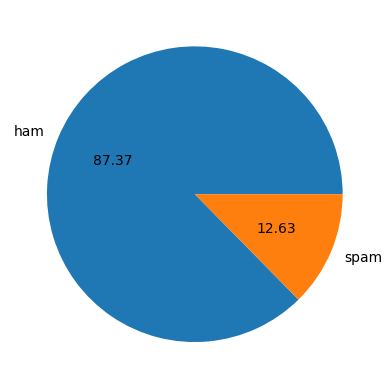

In [179]:
plt.pie(data['Target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [180]:
# imbalanced dataset 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sabhy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [181]:
# calculating no. of alphabets in SMS
data['num_char']=data['Text'].apply(len)

In [182]:
data.head()

,Target,Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [183]:
#  calculating no. of words in SMS
data['num_words']=data['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,Target,Text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [184]:
#  calculating no. of sentences in SMS
data['num_sentences']=data['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,Target,Text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [185]:
# describing dataset
data[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [186]:
# ham messages
data[data['Target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [187]:
# spam messages
data[data['Target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

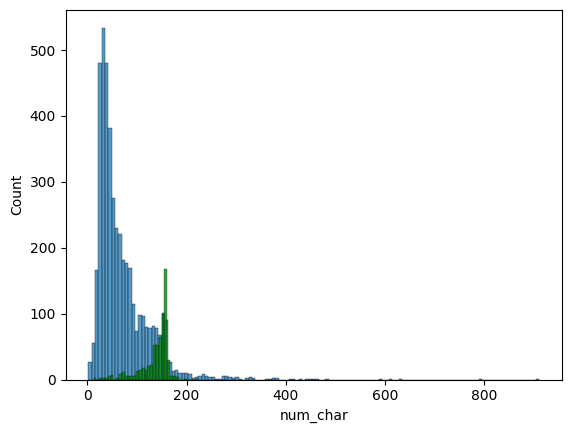

In [188]:
# representing through histogram
sns.histplot(data[data['Target']==0]['num_char'])
sns.histplot(data[data['Target']==1]['num_char'], color='green')

<Axes: xlabel='num_words', ylabel='Count'>

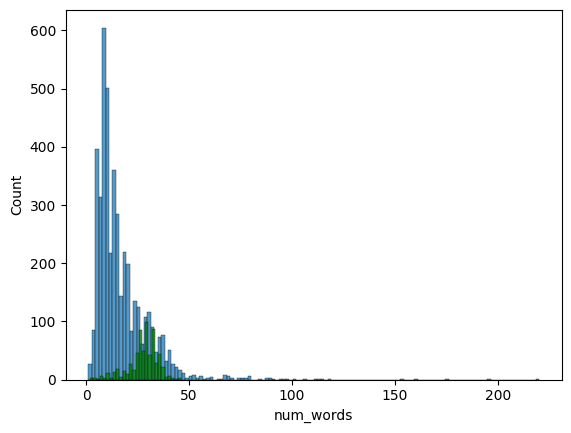

In [189]:
sns.histplot(data[data['Target']==0]['num_words'])
sns.histplot(data[data['Target']==1]['num_words'], color='green')

c:\Users\sabhy\OneDrive\desktop\python\main\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


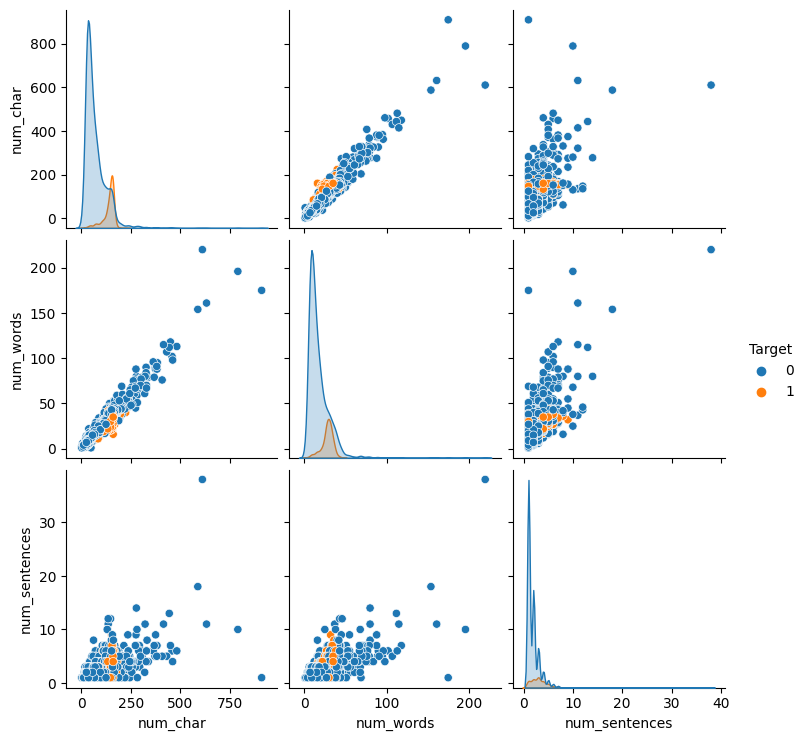

In [190]:
# showing relationships between num_char, num_words, num_sentences
sns.pairplot(data, hue='Target')

# Data Preprocessing
  1. Lower case
  2. Tokenization
  3. Removing special characters
  4. Removing stop words and punctuation
  5. Stemming

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabhy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [192]:
def transform_text(Text):
    Text= Text.lower()
    Text = nltk.word_tokenize(Text)

    y=[]
    for i in Text:
        if i.isalnum():
            y.append(i)

    Text = y[:]
    y.clear()

    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    Text = y[:]
    y.clear() 
    ps = PorterStemmer()
    for i in Text:
        y.append(ps.stem(i))

    return " ".join( y)

In [193]:
data['transformed_text']= data['Text'].apply(transform_text)
data.head()

,Target,Text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


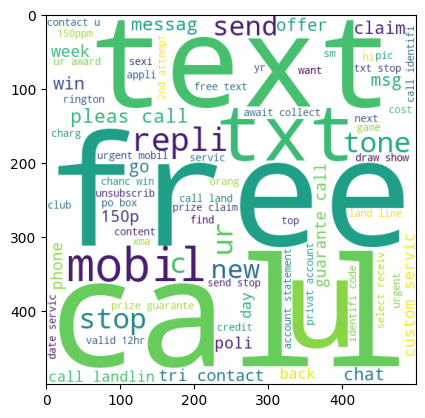

In [203]:
# zooming in the important words in spam
wc= WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc= wc.generate(data[data['Target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

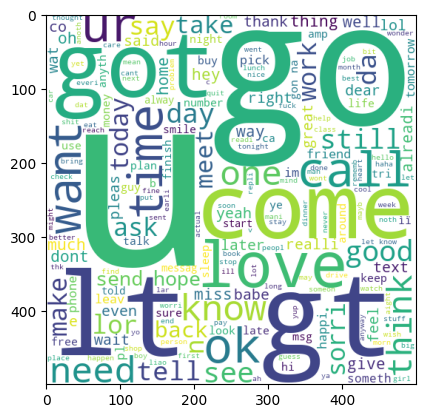

In [205]:
# zooming in the important words in ham
wc= WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc= wc.generate(data[data['Target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

# Model Implementation

In [288]:
cv = CountVectorizer()
x = cv.fit_transform(data['transformed_text']).toarray()
x.shape

(5169, 6708)

In [291]:
y = data['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [292]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [293]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [294]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [295]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [296]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# Model Testing(mNB)
   Using Multinomial Naive Bayes Classifier

In [299]:
new_test_sample_ham = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
     
new_test_sample_ham_vectorized = cv.transform(new_test_sample_ham)
sample_predict = mnb.predict(new_test_sample_ham_vectorized)
sample_predict

array([0])

In [300]:
test_sample_spam= ["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
test_sample_spam_vectorized = cv.transform(test_sample_spam)
sample = mnb.predict(test_sample_spam_vectorized)
sample

array([1])